In [154]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports 
import pandas as pd
import numpy as np
from psutil import virtual_memory
from bs4 import BeautifulSoup
import re
import itertools
from collections import Counter
from collections import namedtuple
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 7.0)

In [106]:
# Optimizing memory usage
mem = virtual_memory()
size = int(mem.total/1000000)
# Loading .csv.zip in dataframe
df = pd.read_csv('data/Train.zip', compression='zip',header=0,sep=',', quotechar='"', chunksize=size)

In [107]:
counter_tags = Counter()
counter_card = Counter()
print("Computing the dataset counters ...")
for chunk in df:
    tags = chunk["Tags"].tolist()
    tags_tokenized = [[x for x in t.split()] for t in tags]
    tags_card = [len(x) for x in tags_tokenized]
    tags_concat = [x for t in tags_tokenized for x in t]
    counter_tags.update(tags_concat)
    counter_card.update(tags_card)
print("Counter built.")

Computing the dataset counters ...
Counter built.


## Tag distribution

Find 42048 unique tags in the dataset
Most common tags [('c#', 463526), ('java', 412189), ('php', 392451), ('javascript', 365623), ('android', 320622)]
Average number of tags per topic 3.000000
Number of tags describing 0.950000 of the topics : 8969


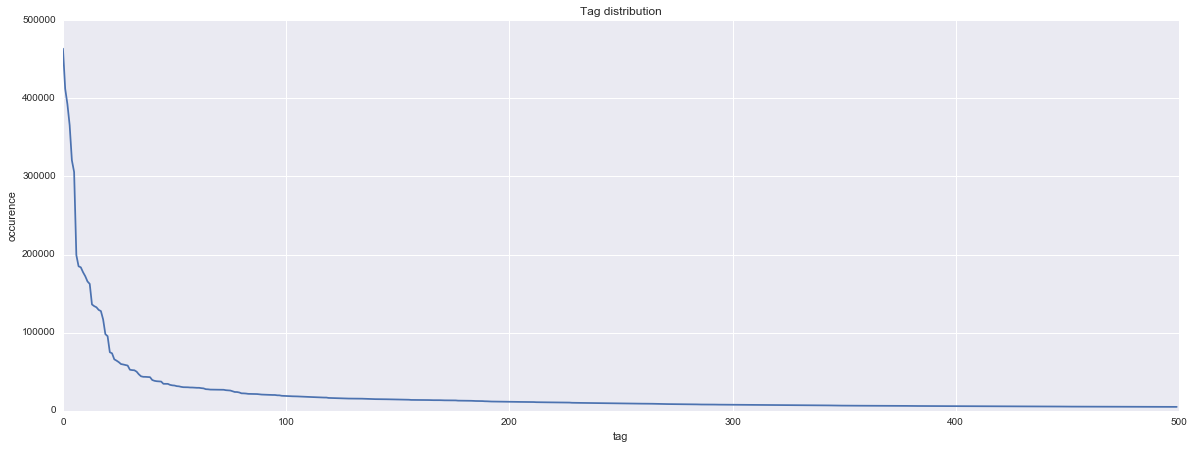

In [109]:
print("Found %d unique tags in the dataset" % len(counter_tags.items()))
print("Most common tags %s" % counter_tags.most_common(5))

# Order the tag vocabulary
tag_counts = [x for x in counter_tags.items()]
tag_counts.sort(key=lambda x: x[1], reverse=True)
# create a tag_to_id vocabulary
reverse_vocab = [x[0] for x in tag_counts]
vocab = dict([(x, y) for (y, x) in enumerate(reverse_vocab)])
# create series for matplotlib
x = [vocab[c[0]] for c in counter_tags.most_common(500)]
y = [c[1] for c in counter_tags.most_common(500)]

plt.plot(x, y)
plt.xlabel("tag")
plt.ylabel("occurence")
plt.title("Tag distribution")

nb_tags = np.sum([x for x in counter_tags.values()])
topic_coverage = 0.95
percentage = 0
index = 0
most_common_tags = []
while(percentage < topic_coverage):
    most_common_tags.append(tag_counts[index][0])
    percentage += tag_counts[index][1] / nb_tags
    index += 1
print("Number of tags describing %f of the topics : %d" % (topic_coverage, len(most_common_tags)))

Zipf's law : the frequency of any word is inversely proportional to its rank in the frequency table

## Tag cardinality per topic

Max number of tags : 5.000000
Min number of tags : 1.000000
Counter({3: 1728500, 2: 1608230, 4: 1156927, 1: 830591, 5: 709947})


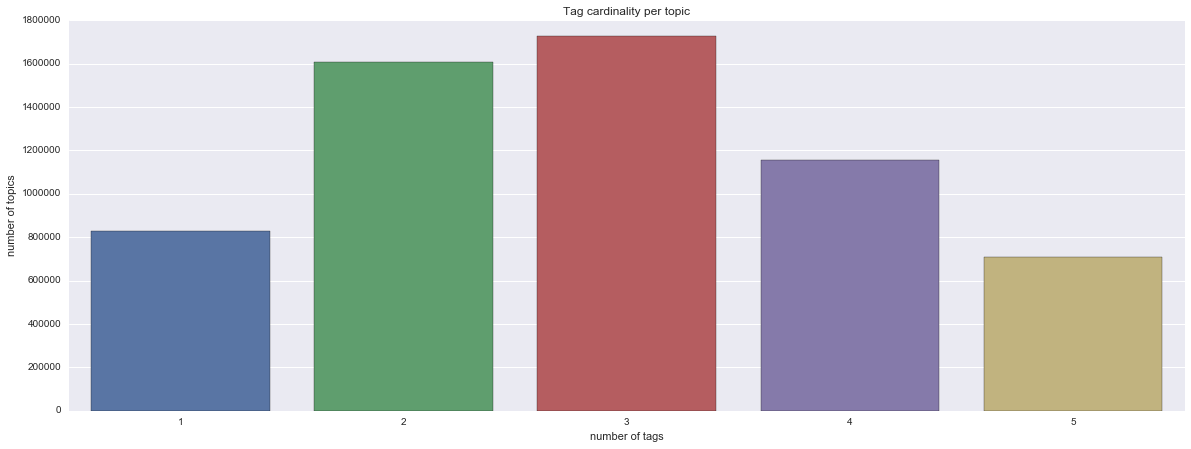

In [114]:
print("Max number of tags : %f" % np.max(counter_card.keys()))
print("Min number of tags : %f" % np.min(counter_card.keys()))
print(counter_card)
x = [c for c in counter_card.keys()]
y = [c for c in counter_card.values()]
sns.barplot(x, y)
plt.xlabel("number of tags")
plt.ylabel("number of topics")
plt.title("Tag cardinality per topic")